In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## The Goal:
train a classifier that can predict titanic's survived column based on the other columns

...

In [40]:
titanic = pd.read_csv("titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The attributes have the following meaning:
* **PassengerId**: a unique identifier for each passenger
* **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
* **Pclass**: passenger class.
* **Name**, **Sex**, **Age**: self-explanatory
* **SibSp**: how many siblings or spouses of the passenger aboard the Titanic.
* **Parch**: how many children or parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: where the passenger embarked the Titanic

In [80]:
data = titanic.copy()

...

# Exploratory Data Analysis
- Understand the data as best we can

In [5]:
data.shape

(891, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.describe(include=["object"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


int64      5
object     5
float64    2
Name: count, dtype: int64


<Axes: ylabel='count'>

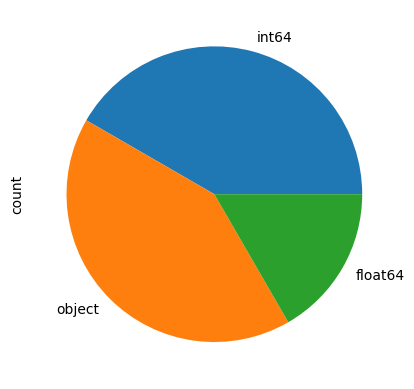

In [17]:
print(data.dtypes.value_counts())
data.dtypes.value_counts().plot.pie()

<Axes: >

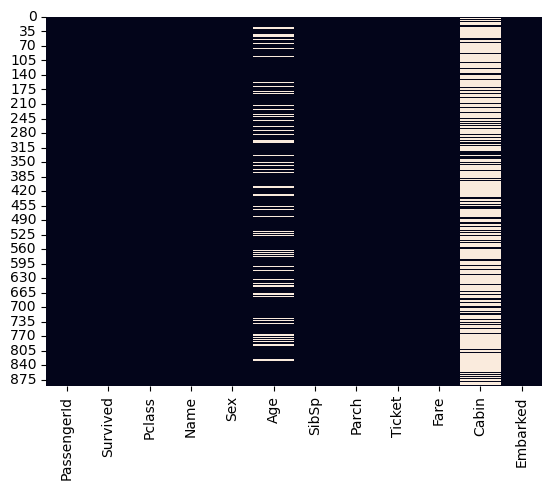

In [27]:
sns.heatmap(data.isna(), cbar=False)

The white lines present missing values

In [31]:
(data.isna().sum()/data.shape[0]).sort_values()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
Age            0.198653
Cabin          0.771044
dtype: float64

In [81]:
data = data[data.columns[data.isna().sum() / data.shape[0] < 0.7]]
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [82]:
data = data.drop(["PassengerId", "Name", "Ticket"], axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


<Axes: >

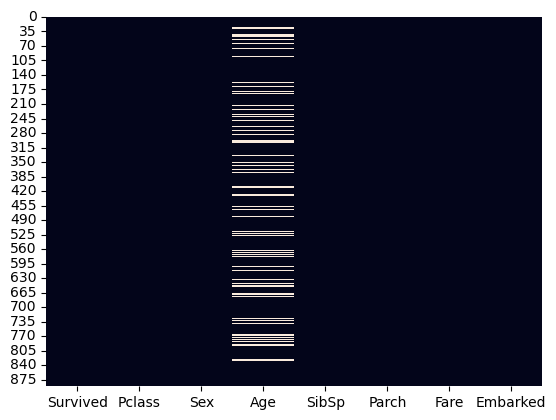

In [83]:
sns.heatmap(data.isna(), cbar=False)

In [56]:
data["Survived"].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

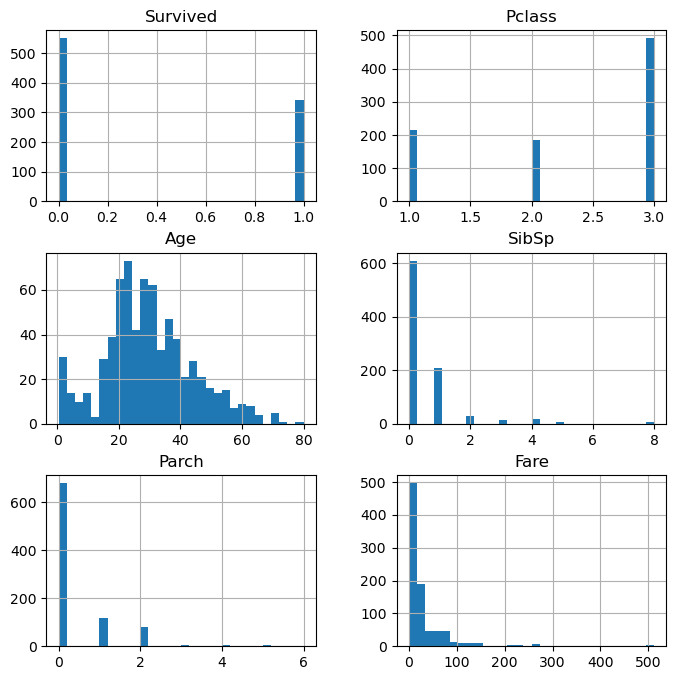

In [84]:
data.hist(bins=30, figsize=(8,8))

- **Survived** : Most of the passengers did not survived
- **Pclass** : There were most people in class 3
- **Age** : Most of the passengers were 20 to 40 years old
- **SibSp and Parch** Most of the people did not have Parch and Sibsp
- **Fare** Most of people paid between 0-100 pounds

<Figure size 640x480 with 0 Axes>

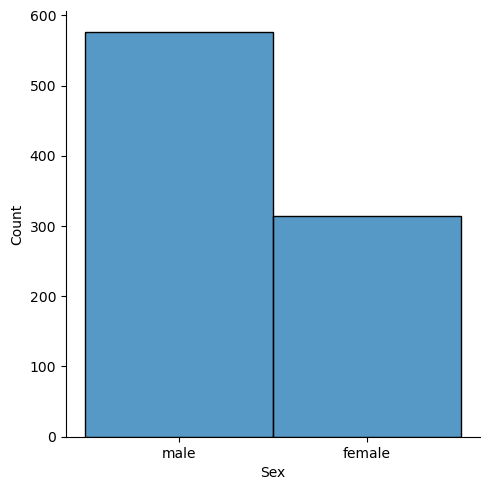

<Figure size 640x480 with 0 Axes>

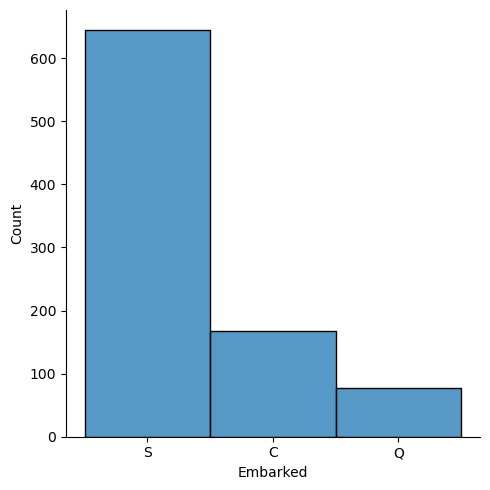

In [85]:
for col in data.select_dtypes("object"):
  plt.figure()
  sns.displot(data[col], bins=30)

- **Sex** : There were more men than woman
- **Embarked**: Most people boarded in S

In [90]:
variable_cat = ["Sex", "Embarked", "Survived", "Pclass"]
for col in variable_cat:
  print(f"{col:-<30} {data[col].unique()}")

Sex--------------------------- ['male' 'female']
Embarked---------------------- ['S' 'C' 'Q' nan]
Survived---------------------- [0 1]
Pclass------------------------ [3 1 2]


In [103]:
for col in variable_cat:
  #plt.figure()
  print(data[col].value_counts(normalize=True))
  print("")

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64



In [104]:
negative = data[data["Survived"] == 0]
negative

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
888,0,3,female,NaN,1,2,23.4500,S


In [105]:
positive = data[data["Survived"] == 1]
positive

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C
879,1,1,female,56.0,0,1,83.1583,C
880,1,2,female,25.0,0,1,26.0000,S
887,1,1,female,19.0,0,0,30.0000,S


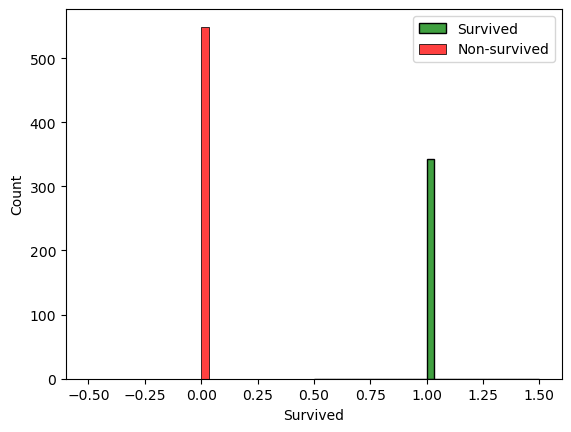

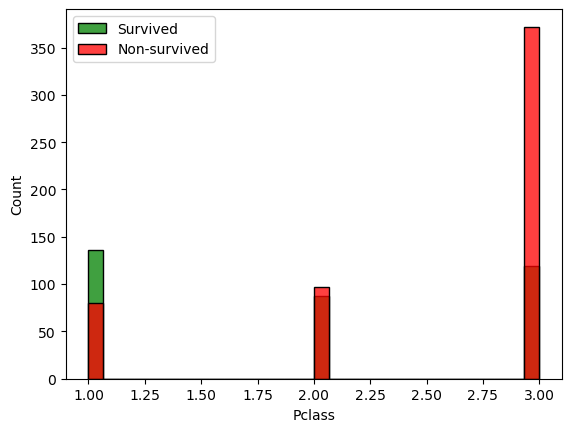

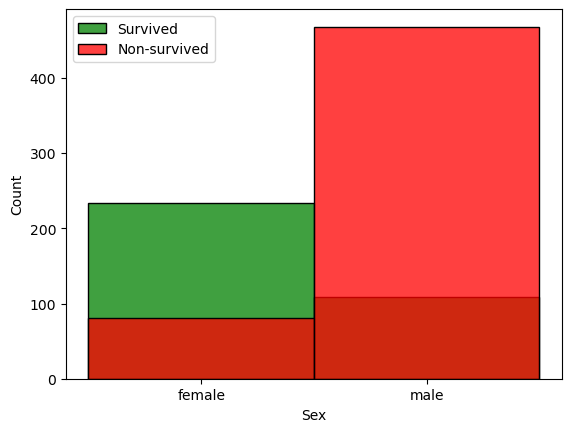

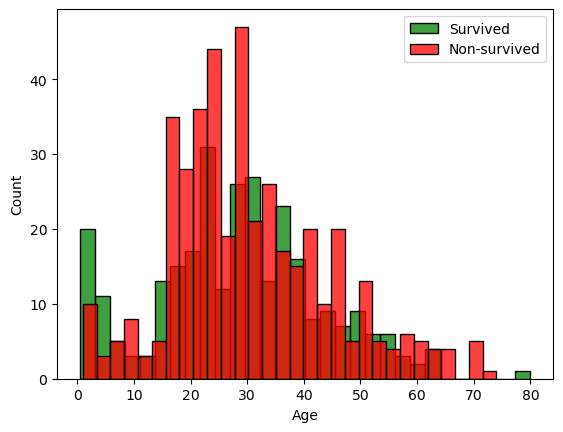

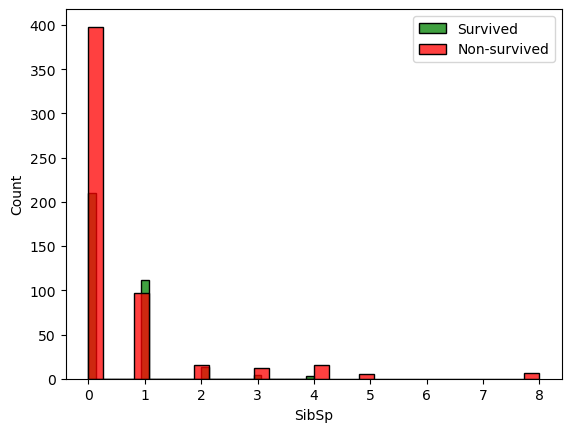

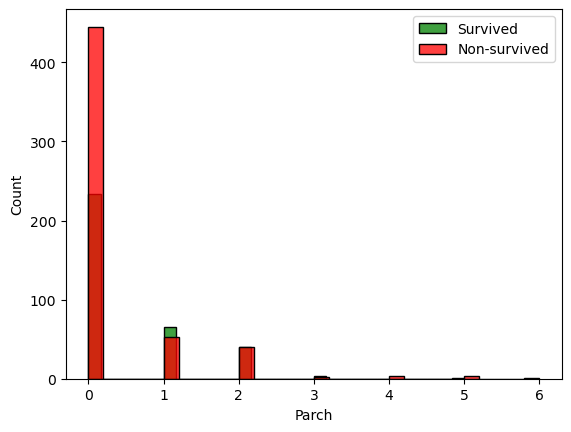

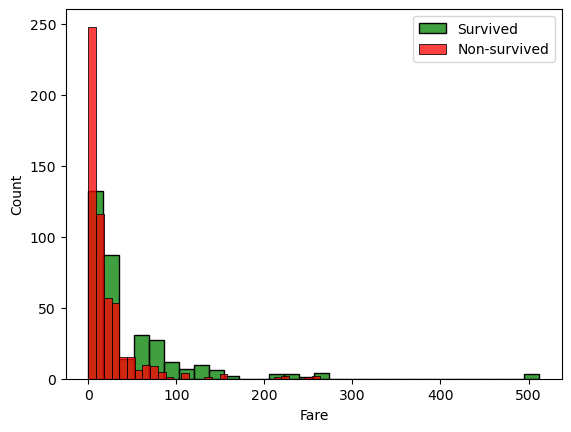

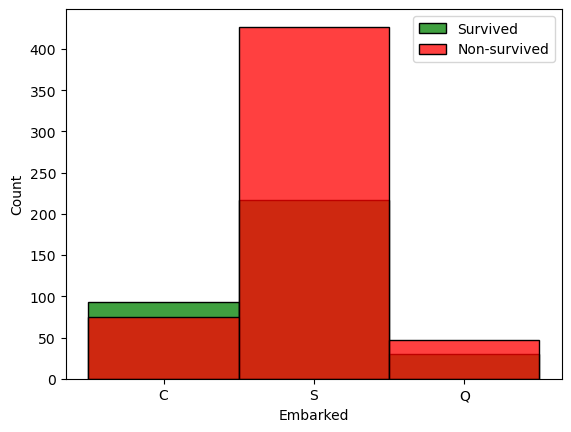

In [157]:
for col in list(data.columns):
  plt.figure()
  sns.histplot(positive[col], bins=30, label="Survived", color="green")
  sns.histplot(negative[col], bins=30, label="Non-survived", color="red")
  plt.legend()

relation between target and other columns

# Note
- **Target** : Survived
- **Num of rows and columns** : 891, 12
- **Variable type** : quantitative (7), qualitative (5)
- **Missing values** : three variables have missing values, Cabin with 77%, Age with 19% and Embarked with 0.002%
- **Dropped Variable** : useless variable (PassengerId, Name and Ticket), too many missing values (Embarked)
  
- **Visualizing the target** : about 38% of passengers survived and 63% did not.
 - **Signification of variables**:
    - **Categorical** : (Embarked, Sex, Pclass, Survived)
    - **Continues** : (Age, Fare, SibSp, Parch) the last three are skewed left
   